<a href="https://colab.research.google.com/github/Narcissa18/CreateAccountFormAutomation/blob/master/Elective_Project_of_High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [3]:
import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
!pip install h5py

In [5]:
import h5py

**Let us check the version of tensorflow.**

In [6]:
tf.__version__

'2.15.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [7]:
# File path in Google Drive
file_path = '/content/drive/MyDrive/Python Course/SVHN_single_grey1.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    # List all groups in the HDF5 file
    print("Keys in HDF5 file:", list(hdf.keys()))

    # Check for the correct dataset name
    for key in hdf.keys():
        print("Dataset:", key)

    # Access a specific dataset
    dataset_name = 'X_train'
    dataset = hdf[dataset_name][:]

    # Print dataset information
    print("Dataset shape:", dataset.shape)
    print("Dataset type:", dataset.dtype)

    # Print some data points
    print("Example data points:", dataset[:5])

Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Dataset: X_test
Dataset: X_train
Dataset: X_val
Dataset: y_test
Dataset: y_train
Dataset: y_val
Dataset shape: (42000, 32, 32)
Dataset type: float32
Example data points: [[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  7

Check the number of images in the training and the testing dataset.

In [8]:
with h5py.File(file_path, 'r') as hdf:
  X_train = hdf['X_train']
  print(f"Training dataset shape: {X_train.shape}")
  print(f"Image count in training dataset: {X_train.shape[0]}")

  X_test = hdf['X_test']
  print(f"Testing dataset shape: {X_test.shape}")
  print(f"Image count in testing dataset: {X_test.shape[0]}")

  X_val = hdf['X_val']
  print(f"Validation dataset shape: {X_val.shape}")
  print(f"Image count in validation dataset: {X_val.shape[0]}")

  y_train = hdf['y_train']
  print(f"Shape of labels corresponding to training dataset: {y_train.shape[0]}")

  y_test = hdf['y_test']
  print(f"Shape of labels corresponding to testing dataset: {y_test.shape[0]}")

  y_val = hdf['y_val']
  print(f"Shape of labels corresponding to validation dataset: {y_val.shape[0]}")




Training dataset shape: (42000, 32, 32)
Image count in training dataset: 42000
Testing dataset shape: (18000, 32, 32)
Image count in testing dataset: 18000
Validation dataset shape: (60000, 32, 32)
Image count in validation dataset: 60000
Shape of labels corresponding to training dataset: 42000
Shape of labels corresponding to testing dataset: 18000
Shape of labels corresponding to validation dataset: 60000


**Observation:**
.h5 file has training, testing and validation dataset with 42K, 18K and 60K images in them respectively. Images has dimensions of 32x32 pixels. Pixel value of the images are float32. Each dataset has a corresponding set of labels (y_train, y_val, y_test), which are essential for supervised learning tasks.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

Training dataset shape: (42000, 32, 32)


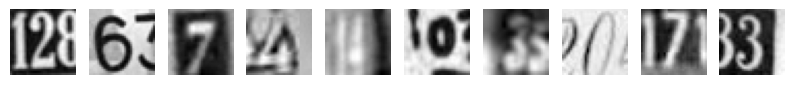

In [9]:
with h5py.File(file_path, 'r') as hdf:
   #access the training dataset
   X_train = hdf['X_train'][:]

   print(f"Training dataset shape: {X_train.shape}")

   #visualize the images
   plt.figure(figsize=(10, 10))
   for i in range(10):
      plt.subplot(1, 10, i+1)
      plt.imshow(X_train[i], cmap='gray')
      plt.axis('off')
   plt.show()


In [10]:
with h5py.File(file_path, 'r') as hdf:
   #access the training dataset
   y_train = hdf['y_train'][:]

   print(f"Training dataset shape: {y_train.shape[0]}")
   print("First 10 labels: ", y_train[:10])

Training dataset shape: 42000
First 10 labels:  [2 6 7 4 4 0 3 0 7 3]


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [11]:
print(f"First image of training dataset: {X_train[0].shape}")
print(f"Array of pixels for the first image: \n{X_train[0]}")

First image of training dataset: (32, 32)
Array of pixels for the first image: 
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [12]:
with h5py.File(file_path, 'r') as hdf:

    # Access the training dataset
    X_train = hdf['X_train'][:]
    X_test = hdf['X_test'][:]

X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0

print(f"First image of training dataset: {X_train_normalized[0].shape}")
print(f"Array of pixels for the first image: \n{X_train_normalized[0]}")

First image of training dataset: (32, 32)
Array of pixels for the first image: 
[[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]


Print the shapes of Training and Test data

In [13]:
print(f"Training dataset shape: {X_train_normalized.shape[0]}")
print(f"Test dataset shape: {X_test_normalized.shape[0]}")

Training dataset shape: 42000
Test dataset shape: 18000


### **One-hot encode output**

In [14]:
from tensorflow.keras.utils import to_categorical

with h5py.File(file_path, 'r') as hdf:
    # Access the labels
    y_train = hdf['y_train'][:]
    y_test = hdf['y_test'][:]

    # Perform one-hot encoding on the labels
    y_train_one_hot = to_categorical(y_train)
    y_test_one_hot = to_categorical(y_test)

    # Print the shape of the one-hot encoded labels
    print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
    print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

    # Print the first 5 one-hot encoded labels for verification
    print("First 5 one-hot encoded labels (y_train):")
    print(y_train_one_hot[:5])

Shape of y_train_one_hot: (42000, 10)
Shape of y_test_one_hot: (18000, 10)
First 5 one-hot encoded labels (y_train):
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Observation:**
Training dataset contains 42K samples and test dataset has 18K. Data has been normalized and preprocessed and ready for modeling.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [15]:
#setting a set for reproducibility
np.random.seed(42)

#generating a random number as an example
print(np.random.random())

0.3745401188473625


 ### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_nn_model(input_shape=(32,32), num_classes=10):

    nn_model1 = Sequential()

    # Flatten layer to convert image data to 1D
    nn_model1.add(Flatten(input_shape=input_shape))

    #First hidden layer with 64 nodes and relu activation
    nn_model1.add(Dense(units=64, activation='relu', input_shape=input_shape)),

    # second hidden layer with 32 nodes and relu activation
    nn_model1.add(Dense(units=32, activation='relu')),

    # Output layer with softmax activation and number of nodes equal to num_classes
    nn_model1.add(Dense(units=num_classes, activation="softmax"))

    # Compile the model
    nn_model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return nn_model1

model = create_nn_model(input_shape=(32,32), num_classes=10)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Build and train an ANN model as per the above mentioned architecture.**

In [17]:
#Fit the model

tf.config.run_functions_eagerly(True)
history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=128, verbose=1, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
263/263 [==============================] - 24s 89ms/step - loss: 6.8801 - accuracy: 0.1004 - val_loss: 2.3151 - val_accuracy: 0.1048
Epoch 2/20
263/263 [==============================] - 10s 37ms/step - loss: 2.3077 - accuracy: 0.1005 - val_loss: 2.3092 - val_accuracy: 0.1014
Epoch 3/20
263/263 [==============================] - 10s 38ms/step - loss: 2.3040 - accuracy: 0.1012 - val_loss: 2.3060 - val_accuracy: 0.1014
Epoch 4/20
263/263 [==============================] - 10s 39ms/step - loss: 2.3033 - accuracy: 0.1025 - val_loss: 2.3044 - val_accuracy: 0.1013
Epoch 5/20
263/263 [==============================] - 10s 38ms/step - loss: 2.3030 - accuracy: 0.1018 - val_loss: 2.3051 - val_accuracy: 0.1017
Epoch 6/20
263/263 [==============================] - 10s 39ms/step - loss: 2.3026 - accuracy: 0.1023 - val_loss: 2.3040 - val_accuracy: 0.1014
Epoch 7/20
263/263 [==============================] - 10s 39ms/step - loss: 2.3022 - accuracy: 0.1024 - val_loss: 2.3041 - val_accuracy:

### **Plot the Training and Validation Accuracies and write down your Observations.**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


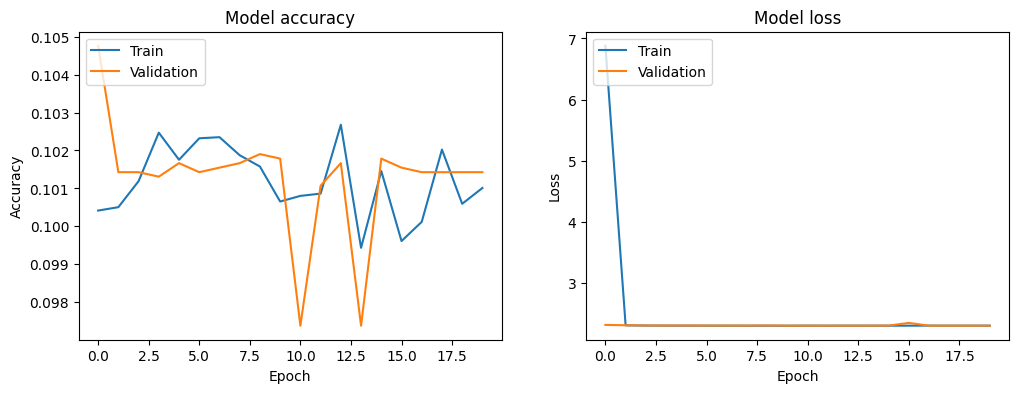

In [18]:
# Print the history keys to see what metrics are available
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations: The ANN model is improving with each epoch. By epoch 20 accuracy reached ~60%. We can see that Validation data accuracy increased, but also fluctuated a lot, which can mean model is overfitting. Both training and validation set loss decresed with each epoch. Overall, this model would need more epochs to converge fully.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [19]:
from tensorflow.keras import backend as K
K.clear_session()


In [20]:
#setting a set for reproducibility
np.random.seed(42)

#generating a random number as an example
print(np.random.random())

0.3745401188473625


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [21]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

def create_nn_model2(input_shape=(32,32), num_classes=10):

    nn_model2 = Sequential()

    # Flatten layer to convert image data to 1D
    nn_model2.add(Flatten(input_shape=input_shape))

    #First hidden layer with 256 nodes and relu activation
    nn_model2.add(Dense(units=256, activation='relu', input_shape=input_shape)),

    # second hidden layer with 128 nodes and relu activation
    nn_model2.add(Dense(units=128, activation='relu')),
    nn_model2.add(Dropout(0.2))

    #Third hidden layer with 64 nodes and relu activation
    nn_model2.add(Dense(units=64, activation='relu')),

    #Fourth hidden layer with 64 nodes and relu activation
    nn_model2.add(Dense(units=64, activation='relu')),
    nn_model2.add(BatchNormalization()),

    # Output layer with softmax activation and number of nodes equal to num_classes
    nn_model2.add(Dense(units=num_classes, activation="softmax"))

    # Compile the model
    nn_model2.compile(optimizer = Adam(learning_rate=0.0005),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return nn_model2

model2 = create_nn_model2(input_shape=(32,32), num_classes=10)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (Batch  (None, 64)                2

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [22]:
#Fit the model

tf.config.run_functions_eagerly(True)
history = model2.fit(X_train, y_train_one_hot, epochs=30, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/30
263/263 [==============================] - 19s 71ms/step - loss: 2.4329 - accuracy: 0.1015 - val_loss: 2.3255 - val_accuracy: 0.1014
Epoch 2/30
263/263 [==============================] - 19s 73ms/step - loss: 2.3212 - accuracy: 0.1014 - val_loss: 2.3087 - val_accuracy: 0.1052
Epoch 3/30
263/263 [==============================] - 20s 76ms/step - loss: 2.3013 - accuracy: 0.1192 - val_loss: 2.2593 - val_accuracy: 0.1396
Epoch 4/30
263/263 [==============================] - 26s 100ms/step - loss: 2.2123 - accuracy: 0.1475 - val_loss: 2.2237 - val_accuracy: 0.1452
Epoch 5/30
263/263 [==============================] - 25s 94ms/step - loss: 2.0939 - accuracy: 0.1805 - val_loss: 1.9682 - val_accuracy: 0.2263
Epoch 6/30
263/263 [==============================] - 23s 87ms/step - loss: 2.0738 - accuracy: 0.1929 - val_loss: 2.0784 - val_accuracy: 0.1908
Epoch 7/30
263/263 [==============================] - 18s 69ms/step - loss: 2.0394 - accuracy: 0.2028 - val_loss: 1.9702 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


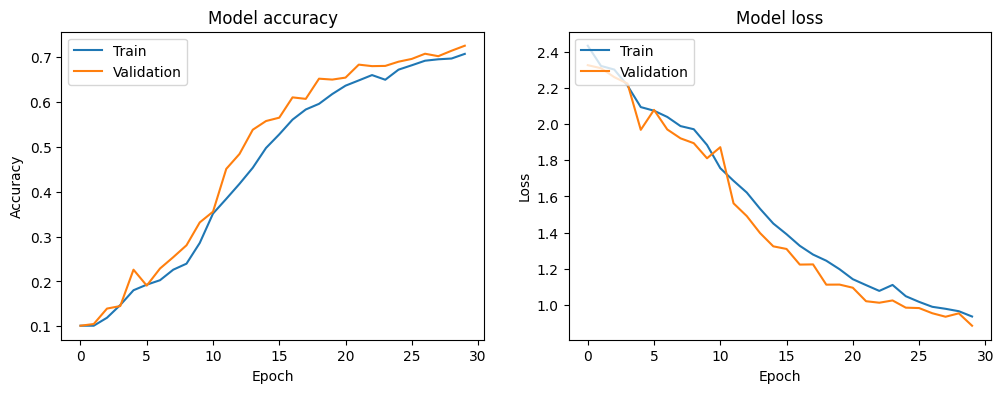

In [23]:
# Print the history keys to see what metrics are available
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations: By adding additional layers of DropOut and BatchNormalization, and also changing the learning rate, accuracy improved. After 30 epochs it was 74% for both training and validation datasets, which means there is no overfitting.Loss also decreased for both training and validation data sets.Second model definetely looks promising with a room for improvement.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred = model2.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert y_test_one_hot to class labels
y_true_labels = np.argmax(y_test_one_hot, axis=1)


 16/563 [..............................] - ETA: 3s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


563/563 [==============================] - 5s 9ms/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [25]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1814
           1       0.74      0.75      0.75      1828
           2       0.83      0.70      0.76      1803
           3       0.66      0.70      0.68      1719
           4       0.79      0.79      0.79      1812
           5       0.66      0.72      0.69      1768
           6       0.76      0.73      0.74      1832
           7       0.79      0.75      0.77      1808
           8       0.63      0.73      0.68      1812
           9       0.77      0.65      0.71      1804

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000

Confusion Matrix:
[[1422   39   16   28   36   22   88   33   78   52]
 [  51 1363   17  115   65   32   25   66   65   29]
 [  28   52 1259  119   41   51   13  120   49   71]
 [  26   59   28 1200   22  197   16   47

**Final Observations: Model's F1 score, recall and precision to predict numbers 0, 4 and 7 was higher between ~77%-~80%. F1 score was lower for identifying classes 5, 3 and 8 ranging from 65% to 69%.
Looking at confusion matrix, we can tell the most confused number was number 7 as 2 or 1 121, 106 cases respectively. 5 was misinterpreted in 197 cases out of 1768. Third most mistaken digit is 9. It was identified as number 6 124 times out of  cases.**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [26]:
# File path in Google Drive
file_path = '/content/drive/MyDrive/Python Course/SVHN_single_grey1.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    # List all groups in the HDF5 file
    print("Keys in HDF5 file:", list(hdf.keys()))

    # Check for the correct dataset name
    for key in hdf.keys():
        print("Dataset:", key)

    # Access a specific dataset
    dataset_name = 'X_train'
    dataset = hdf[dataset_name][:]

    # Print dataset information
    print("Dataset shape:", dataset.shape)
    print("Dataset type:", dataset.dtype)

    # Print some data points
    print("Example data points:", dataset[:5])

Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Dataset: X_test
Dataset: X_train
Dataset: X_val
Dataset: y_test
Dataset: y_train
Dataset: y_val
Dataset shape: (42000, 32, 32)
Dataset type: float32
Example data points: [[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  7

Check the number of images in the training and the testing dataset.

In [34]:
with h5py.File(file_path, 'r') as hdf:
  X_train = hdf['X_train']
  print(f"Training dataset shape: {X_train.shape}")
  print(f"Image count in training dataset: {X_train.shape[0]}")

  X_test = hdf['X_test']
  print(f"Testing dataset shape: {X_test.shape}")
  print(f"Image count in testing dataset: {X_test.shape[0]}")


Training dataset shape: (42000, 32, 32)
Image count in training dataset: 42000
Testing dataset shape: (18000, 32, 32)
Image count in testing dataset: 18000


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [35]:
with h5py.File(file_path, 'r') as hdf:

    # Access the training dataset
    X_train = hdf['X_train'][:]
    X_test = hdf['X_test'][:]

#Print the shape and the array of pixels for the first image in the training dataset.
print(f"First image of training dataset: {X_train[0].shape}")
print(f"Array of pixels for the first image: \n{X_train[0]}")


First image of training dataset: (32, 32)
Array of pixels for the first image: 
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [36]:
# Reshape to (num_samples, height, width, channels)
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [37]:
#Normalize the train and the test dataset by dividing by 255
X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0

print(f"First image of training dataset: {X_train_normalized[0].shape}")
print(f"Array of pixels for the first image: \n{X_train_normalized[0]}")

First image of training dataset: (32, 32, 1)
Array of pixels for the first image: 
[[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]


Print New shape of Training and Test

In [38]:
print(f"Training dataset shape: {X_train_normalized.shape[0]}")
print(f"Test dataset shape: {X_test_normalized.shape[0]}")

Training dataset shape: 42000
Test dataset shape: 18000


### **One-hot encode the labels in the target variable y_train and y_test.**

In [39]:
from tensorflow.keras.utils import to_categorical

with h5py.File(file_path, 'r') as hdf:
    # Access the labels
    y_train = hdf['y_train'][:]
    y_test = hdf['y_test'][:]

    # Perform one-hot encoding on the labels
    y_train_one_hot = to_categorical(y_train)
    y_test_one_hot = to_categorical(y_test)

    # Print the shape of the one-hot encoded labels
    print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
    print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

    # Print the first 5 one-hot encoded labels for verification
    print("First 5 one-hot encoded labels (y_train):")
    print(y_train_one_hot[:5])

Shape of y_train_one_hot: (42000, 10)
Shape of y_test_one_hot: (18000, 10)
First 5 one-hot encoded labels (y_train):
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Observation:**
Training dataset contains 42K samples and test dataset has 18K. Data has been normalized and preprocessed and ready for CNN modeling. Each image is 32x32 pixel, float type.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [40]:
 #setting a set for reproducibility
np.random.seed(42)

#generating a random number as an example
print(np.random.random())

0.3745401188473625


### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [41]:
!pip install tensorflow

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def cnn_model_1(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()

    # First Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Dense layer with LeakyReLU activation
    model.add(Dense(units=32))
    model.add(LeakyReLU(alpha=0.1))

    # Output layer with softmax activation
    model.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model and print the summary
model = cnn_model_1()
model.summary()

# Assuming X_train and y_train_one_hot are already defined
history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, verbose=1, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1050/1050 [==============================] - 133s 127ms/step - loss: 1.7079 - accuracy: 0.6012 - val_loss: 0.9179 - val_accuracy: 0.7362
Epoch 2/20
1050/1050 [==============================] - 125s 119ms/step - loss: 0.6365 - accuracy: 0.8154 - val_loss: 0.6618 - val_accuracy: 0.8120
Epoch 3/20
1050/1050 [==============================] - 121s 115ms/step - loss: 0.5470 - accuracy: 0.8382 - val_loss: 0.5899 - val_accuracy: 0.8354
Epoch 4/20
1050/1050 [==============================] - 120s 114ms/step - loss: 0.4854 - accuracy: 0.8573 - val_loss: 0.6471 - val_accuracy: 0.8123
Epoch 5/20
1050/1050 [==============================] - 158s 151ms/step - loss: 0.4457 - accuracy: 0.8679 - val_loss: 0.5969 - val_accuracy: 0.8383
Epoch 6/20
1050/1050 [==============================] - 145s 138ms/step - loss: 0.4034 - accuracy: 0.8803 - val_loss: 0.5435 - val_accuracy: 0.8598
Epoch 7/20
1050/1050 [==============================] - 140s 134ms/step - loss: 0.3698 - accuracy: 0.8898 - val_loss: 0.622

### **Plot the Training and Validation Accuracies and Write your observations.**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


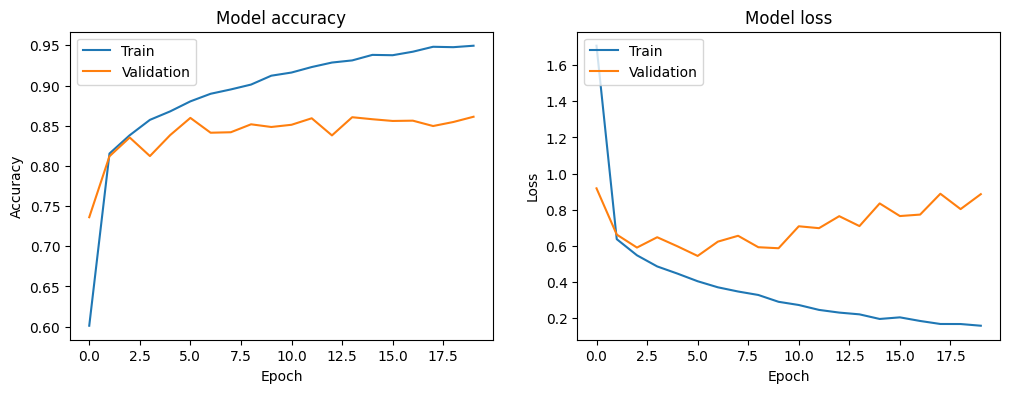

In [43]:
# Print the history keys to see what metrics are available
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations:Training dataset accuracy drastically improved from 60% to 94%. However, model did not do as well with test dataset. Accuracy plateaued around 85% after 6th epoch. We can see the same trend with loss on training dataset vs test dataset.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [44]:
import tensorflow.keras as keras

# Clear previous Keras session
keras.backend.clear_session()

In [45]:
#setting a set for reproducibility
np.random.seed(42)

#generating a random number as an example
print(np.random.random())

0.3745401188473625


### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def cnn_model_2(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()

    # First Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Batch Normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer with LeakyReLU activation
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

     # MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Batch Normalization layer
    model.add(BatchNormalization())

    # Flattenning the output from the previous layer
    model.add(Flatten())

    # Dense layer with LeakyReLU activation
    model.add(Dense(units=32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    # Output layer with softmax activation
    model.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model and printing the summary
model = cnn_model_2()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

### **Build and train the second CNN model as per the above mentioned architecture.**

In [47]:
#Fitting the model
history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
1050/1050 [==============================] - 227s 216ms/step - loss: 1.1948 - accuracy: 0.6096 - val_loss: 0.5332 - val_accuracy: 0.8520
Epoch 2/20
1050/1050 [==============================] - 222s 212ms/step - loss: 0.6423 - accuracy: 0.8053 - val_loss: 0.4547 - val_accuracy: 0.8742
Epoch 3/20
1050/1050 [==============================] - 212s 202ms/step - loss: 0.5426 - accuracy: 0.8363 - val_loss: 0.4709 - val_accuracy: 0.8665
Epoch 4/20
1050/1050 [==============================] - 218s 207ms/step - loss: 0.4810 - accuracy: 0.8567 - val_loss: 0.3826 - val_accuracy: 0.8926
Epoch 5/20
1050/1050 [==============================] - 205s 195ms/step - loss: 0.4414 - accuracy: 0.8680 - val_loss: 0.3577 - val_accuracy: 0.9018
Epoch 6/20
1050/1050 [==============================] - 208s 198ms/step - loss: 0.4110 - accuracy: 0.8765 - val_loss: 0.3740 - val_accuracy: 0.8987
Epoch 7/20
1050/1050 [==============================] - 209s 199ms/step - loss: 0.3823 - accuracy: 0.8850 - val_

### **Plot the Training and Validation accuracies and write your observations.**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


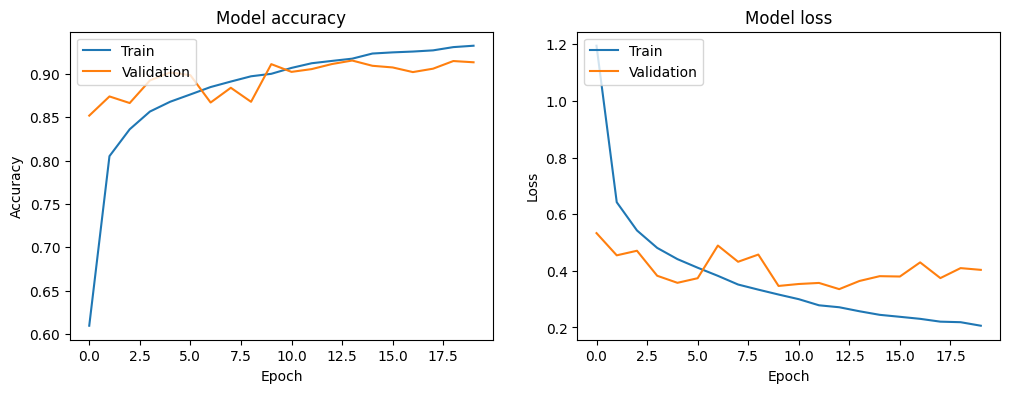

In [48]:
# Print the history keys to see what metrics are available
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Observations:
Second CNN model accuracy was able to improve on training set from 60% to 93 %, which is pretty good. On validation dataset, accuracy was 85% and went up to 91%. 20 epochs was reasonable epoch count to stop at, as accuracy was plateauing for past two epochs.Both training and validation datasets look consistent on the plot for accuracy.
On the second model of CNN each epoch took around 3 minutes to run. That might be due to large data size and also more layers/filters within the model. That is one area that could be improved by trying out different size batches and maybe removing the layers that are not that important.
I also noticed that with another run of the model with datasets, accuracy on both training and test dataset decreases. This could be due to overfitting or randomness as with each round different data points are chosen.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [49]:
# Make predictions on the test set
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

563/563 [==============================] - 5s 9ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert y_test_one_hot to categorical labels
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print('Classification Report:')
print(classification_report(y_test_classes, y_pred_classes))

# Print confusion matrix
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1814
           1       0.74      0.75      0.75      1828
           2       0.83      0.70      0.76      1803
           3       0.66      0.70      0.68      1719
           4       0.79      0.79      0.79      1812
           5       0.66      0.72      0.69      1768
           6       0.76      0.73      0.74      1832
           7       0.79      0.75      0.77      1808
           8       0.63      0.73      0.68      1812
           9       0.77      0.65      0.71      1804

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000

Confusion Matrix:
[[1422   39   16   28   36   22   88   33   78   52]
 [  51 1363   17  115   65   32   25   66   65   29]
 [  28   52 1259  119   41   51   13  120   49   71]
 [  26   59   28 1200   22  197   16   47

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

***Performance Metrics***: The CNN model achieved an accuracy of 73%, with a  F1-score of 0.73. Precision and recall were different across different classes, with some classes performing better than others.

***Strengths***: The last CNN model demonstrated good precision and recall for digits 0, 1, and 4, with precision values above 0.75 and balanced recall, indicating effective identification of these digits.

***Areas for Improvement***: Classes such as 2, 5, and 8 show lower precision and recall, suggesting challenges in accurate identification. These classes may benefit from further model tuning or data augmentation to improve performance.

Overall, while the model performs well in distinguishing certain digits, improvements in precision and recall for specific classes could enhance overall accuracy.**